In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

df = pd.read_csv(r'F:\data analytics\DATA ANALYTICS WITH PYTHON\py.project 1\1715338611_sales\Sales.csv')

In [2]:
df.head()

,Date,Time,State,Group,Unit,Sales
0,01-Oct-20,Morning,WA,Kids,8,20000
1,01-Oct-20,Morning,WA,Men,8,20000
2,01-Oct-20,Morning,WA,Women,4,10000
3,01-Oct-20,Morning,WA,Seniors,15,37500
4,01-Oct-20,Afternoon,WA,Kids,3,7500


In [3]:
# check missing value
df.isna().sum()

Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    7560 non-null   object
 1   Time    7560 non-null   object
 2   State   7560 non-null   object
 3   Group   7560 non-null   object
 4   Unit    7560 non-null   int64 
 5   Sales   7560 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 354.5+ KB


In [7]:
# normalise the data for analysis
df_dataonly = df[['Unit','Sales']]
df_dataonly.head()


,Unit,Sales
0,8,20000
1,8,20000
2,4,10000
3,15,37500
4,3,7500


In [11]:
normalise = MinMaxScaler()
normalise_data = normalise.fit_transform(df_dataonly)
df_normalised = pd.DataFrame(normalise_data,columns=df_dataonly.columns,index=df_dataonly.index)
df_normalised

,Unit,Sales
0,0.095238,0.095238
1,0.095238,0.095238
2,0.031746,0.031746
3,0.206349,0.206349
4,0.015873,0.015873
...,...,...
7555,0.190476,0.190476
7556,0.206349,0.206349
7557,0.206349,0.206349
7558,0.142857,0.142857


In [12]:
df.head()

,Date,Time,State,Group,Unit,Sales
0,01-Oct-20,Morning,WA,Kids,8,20000
1,01-Oct-20,Morning,WA,Men,8,20000
2,01-Oct-20,Morning,WA,Women,4,10000
3,01-Oct-20,Morning,WA,Seniors,15,37500
4,01-Oct-20,Afternoon,WA,Kids,3,7500


In [13]:
df_updated = df[['Date','Time','State','Group']]
df = pd.concat([df_updated,df_normalised],axis=1)
df.head()

,Date,Time,State,Group,Unit,Sales
0,01-Oct-20,Morning,WA,Kids,0.095238,0.095238
1,01-Oct-20,Morning,WA,Men,0.095238,0.095238
2,01-Oct-20,Morning,WA,Women,0.031746,0.031746
3,01-Oct-20,Morning,WA,Seniors,0.206349,0.206349
4,01-Oct-20,Afternoon,WA,Kids,0.015873,0.015873


In [20]:
# visualise all over trend
df_unit_sales = df.groupby(by = 'Date', axis = 'index').sum()
df_unit_sales

C:\Users\Bharat Sharma\AppData\Local\Temp\ipykernel_4912\1058529951.py:2: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  df_unit_sales = df.groupby(by = 'Date', axis = 'index').sum()


,Time,State,Group,Unit,Sales
Date,,,,,
01-Dec-20,Morning Morning Morning Morning Afternoon Aft...,WA WA WA WA WA WA WA WA WA WA WA WAAZAZAZAZAZ...,Kids Men Women Seniors Kids Men Women Seniors...,25.682540,25.682540
01-Nov-20,Morning Morning Morning Morning Afternoon Aft...,WA WA WA WA WA WA WA WA WA WA WA WAAZAZAZAZAZ...,Kids Men Women Seniors Kids Men Women Seniors...,16.507937,16.507937
01-Oct-20,Morning Morning Morning Morning Afternoon Aft...,WA WA WA WA WA WA WA WA WA WA WA WAAZAZAZAZAZ...,Kids Men Women Seniors Kids Men Women Seniors...,20.952381,20.952381
02-Dec-20,Morning Morning Morning Morning Afternoon Aft...,WA WA WA WA WA WA WA WA WA WA WA WAAZAZAZAZAZ...,Kids Men Women Seniors Kids Men Women Seniors...,26.317460,26.317460
02-Nov-20,Morning Morning Morning Morning Afternoon Aft...,WA WA WA WA WA WA WA WA WA WA WA WAAZAZAZAZAZ...,Kids Men Women Seniors Kids Men Women Seniors...,14.634921,14.634921
...,...,...,...,...,...
29-Nov-20,Morning Morning Morning Morning Afternoon Aft...,WA WA WA WA WA WA WA WA WA WA WA WAAZAZAZAZAZ...,Kids Men Women Seniors Kids Men Women Seniors...,17.873016,17.873016
29-Oct-20,Morning Morning Morning Morning Afternoon Aft...,WA WA WA WA WA WA WA WA WA WA WA WAAZAZAZAZAZ...,Kids Men Women Seniors Kids Men Women Seniors...,21.603175,21.603175
30-Dec-20,Morning Morning Morning Morning Afternoon Aft...,WA WA WA WA WA WA WA WA WA WA WA WAAZAZAZAZAZ...,Kids Men Women Seniors Kids Men Women Seniors...,26.476190,26.476190


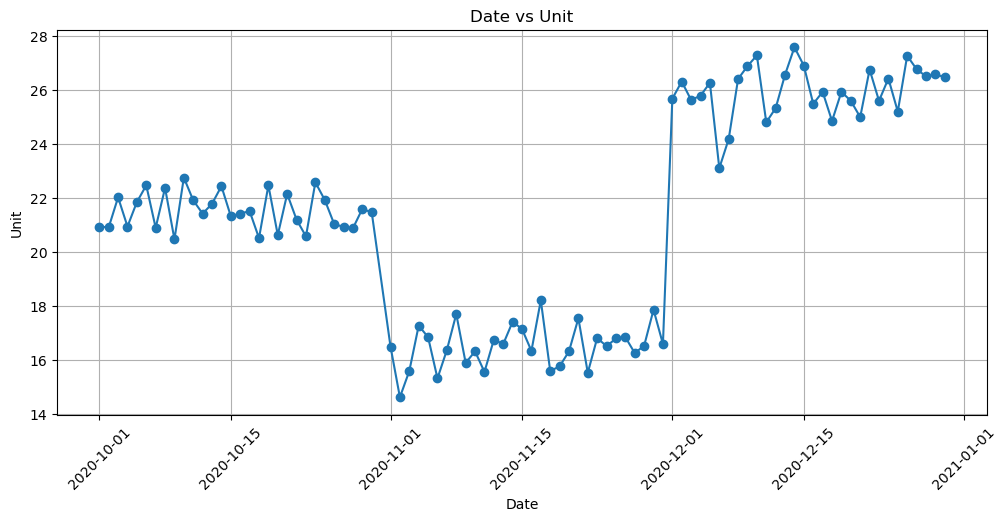

In [21]:
# Converting Date to proper datetime format
df['Date'] = pd.to_datetime(df['Date'], format="%d-%b-%y")

# Grouping Date and sum Unit and Sales
daily = df.groupby('Date')[['Unit', 'Sales']].sum().reset_index()

# Plot Date vs Unit
plt.figure(figsize=(12,5))
plt.plot(daily['Date'], daily['Unit'], marker='o')
plt.xlabel('Date')
plt.ylabel('Unit')
plt.title('Date vs Unit')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

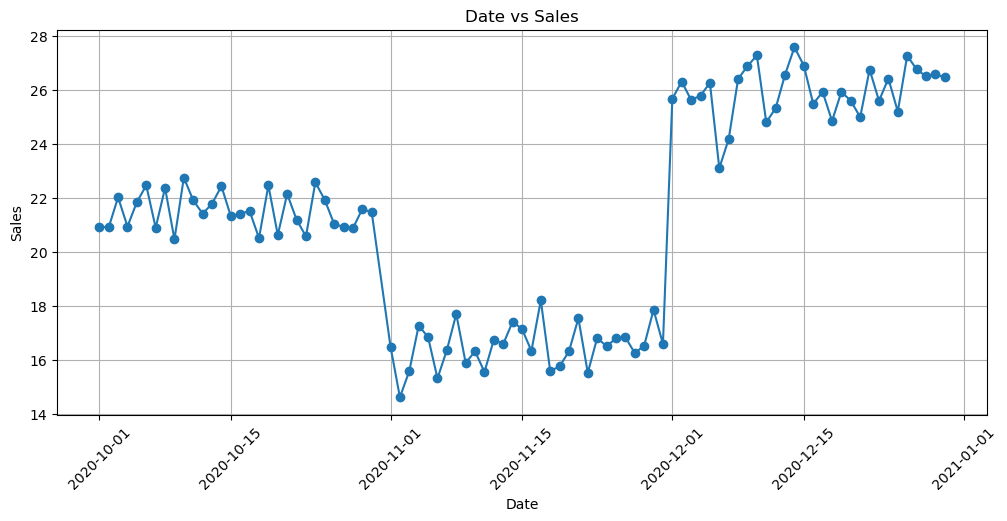

In [22]:
# Ploting for Date vs Sales
plt.figure(figsize=(12,5))
plt.plot(daily['Date'], daily['Sales'], marker='o')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Date vs Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [23]:
# Analyze Monthly Data
# Converting the  Date column to datetime
df['Date'] = pd.to_datetime(df['Date'], format="%d-%b-%y")

# Set Date as index (required for df.loc with date ranges)
df = df.set_index('Date')

# ---- MONTHLY CHUNKING ----
# Example: October, November, December (for a quarter) as mentioned in project
oct_df = df.loc['2020-10-01' : '2020-10-31']
nov_df = df.loc['2020-11-01' : '2020-11-30']
dec_df = df.loc['2020-12-01' : '2020-12-31']

# ---- MONTHLY ANALYSIS ----
# Summing Unit and Sales for each month
oct_summary = oct_df[['Unit', 'Sales']].sum()
nov_summary = nov_df[['Unit', 'Sales']].sum()
dec_summary = dec_df[['Unit', 'Sales']].sum()

print("October Summary:\n", oct_summary)
print("\nNovember Summary:\n", nov_summary)
print("\nDecember Summary:\n", dec_summary)

October Summary:
 Unit     645.650794
Sales    645.650794
dtype: float64

November Summary:
 Unit     495.761905
Sales    495.761905
dtype: float64

December Summary:
 Unit     779.238095
Sales    779.238095
dtype: float64


In [28]:
# describing data
df.describe()

,Unit,Sales
count,7560.000000,7560.000000
mean,0.254054,0.254054
std,0.204784,0.204784
min,0.000000,0.000000
25%,0.095238,0.095238
50%,0.190476,0.190476
75%,0.380952,0.380952
max,1.000000,1.000000


In [29]:
oct_df.describe()

,Unit,Sales
count,2520.000000,2520.000000
mean,0.256211,0.256211
std,0.189596,0.189596
min,0.015873,0.015873
25%,0.111111,0.111111
50%,0.190476,0.190476
75%,0.396825,0.396825
max,0.761905,0.761905


In [30]:
nov_df.describe()

,Unit,Sales
count,2520.000000,2520.000000
mean,0.196731,0.196731
std,0.173753,0.173753
min,0.000000,0.000000
25%,0.063492,0.063492
50%,0.126984,0.126984
75%,0.317460,0.317460
max,0.682540,0.682540


In [31]:
dec_df.describe()

,Unit,Sales
count,2520.000000,2520.000000
mean,0.309221,0.309221
std,0.231019,0.231019
min,0.047619,0.047619
25%,0.126984,0.126984
50%,0.206349,0.206349
75%,0.460317,0.460317
max,1.000000,1.000000


C:\Users\Bharat Sharma\AppData\Local\Temp\ipykernel_4912\2851394858.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(unit_data, labels=['October', 'November', 'December'])


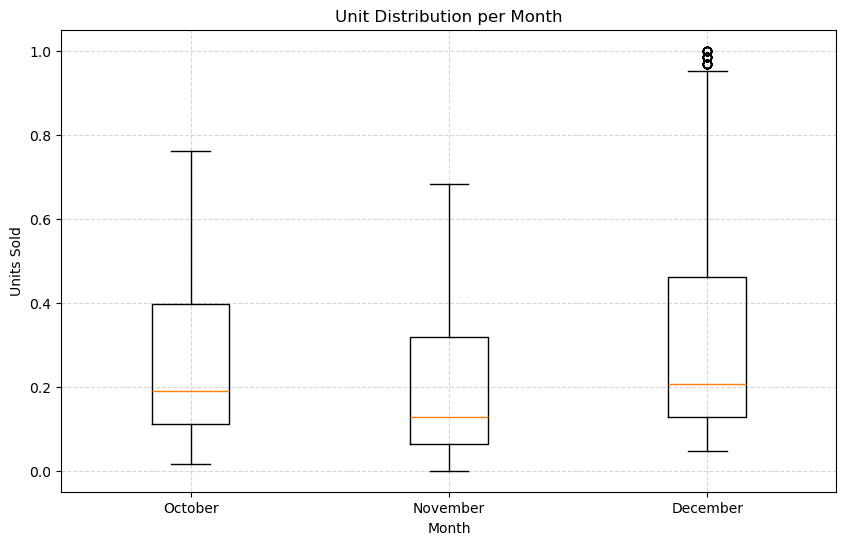

In [32]:
# ANALYSE UNIT DATA
# UNIT ANALYSIS
# ---- UNIT DISTRIBUTION BOXPLOTS FOR EACH MONTH ----
plt.figure(figsize=(10, 6))

# Prepare data for the boxplot
unit_data = [
    oct_df['Unit'],
    nov_df['Unit'],
    dec_df['Unit']
]

plt.boxplot(unit_data, labels=['October', 'November', 'December'])

plt.title('Unit Distribution per Month')
plt.ylabel('Units Sold')
plt.xlabel('Month')
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()

C:\Users\Bharat Sharma\AppData\Local\Temp\ipykernel_4912\1981272527.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(sales_data, labels=['October', 'November', 'December'])


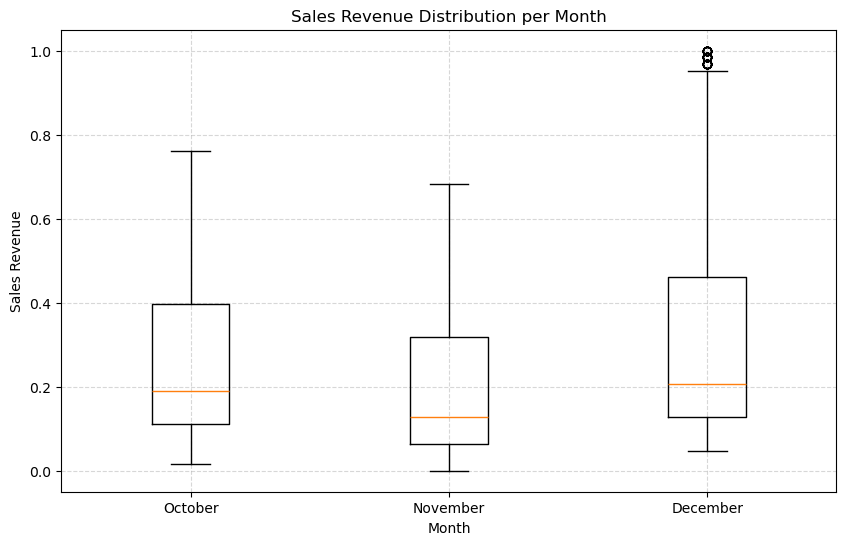

In [33]:
# SALES ANALYSIS
plt.figure(figsize=(10, 6))

sales_data = [
    oct_df['Sales'],
    nov_df['Sales'],
    dec_df['Sales']
]

plt.boxplot(sales_data, labels=['October', 'November', 'December'])

plt.title('Sales Revenue Distribution per Month')
plt.ylabel('Sales Revenue')
plt.xlabel('Month')
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()

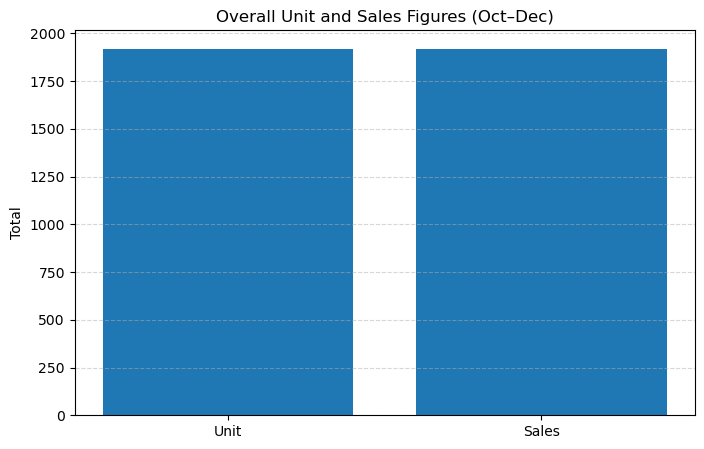

In [34]:
## EXPLORE MONTHLY PLOTS AND ANALYSIS
# --------- 1. OVERALL UNIT & SALES FIGURES ----------
plt.figure(figsize=(8, 5))
totals = df[['Unit', 'Sales']].sum()
plt.bar(totals.index, totals.values)
plt.title('Overall Unit and Sales Figures (Oct–Dec)')
plt.ylabel('Total')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

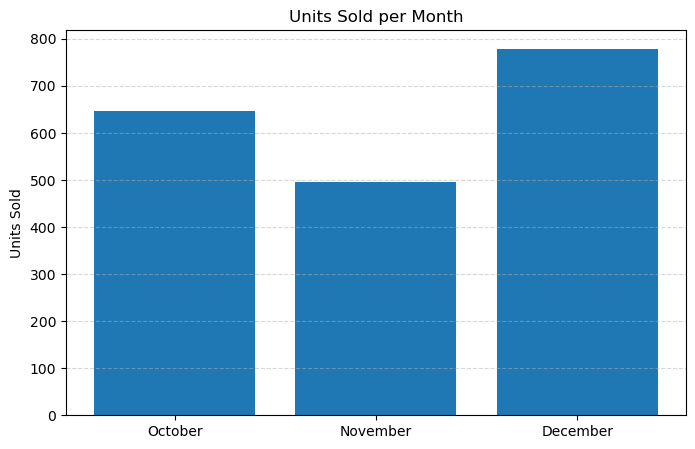

In [35]:
# --------- 2. MONTHLY UNITS PLOT ----------
monthly_units = {
    'October': oct_df['Unit'].sum(),
    'November': nov_df['Unit'].sum(),
    'December': dec_df['Unit'].sum()
}

plt.figure(figsize=(8, 5))
plt.bar(monthly_units.keys(), monthly_units.values())
plt.title('Units Sold per Month')
plt.ylabel('Units Sold')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

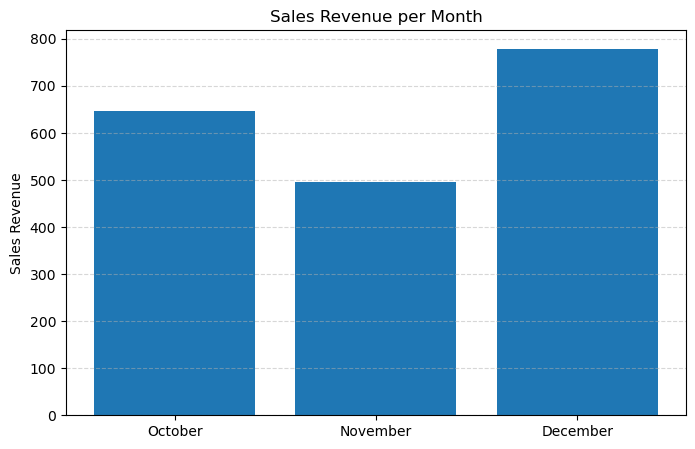

In [36]:
# --------- 3. MONTHLY SALES PLOT ----------
monthly_sales = {
    'October': oct_df['Sales'].sum(),
    'November': nov_df['Sales'].sum(),
    'December': dec_df['Sales'].sum()
}

plt.figure(figsize=(8, 5))
plt.bar(monthly_sales.keys(), monthly_sales.values())
plt.title('Sales Revenue per Month')
plt.ylabel('Sales Revenue')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

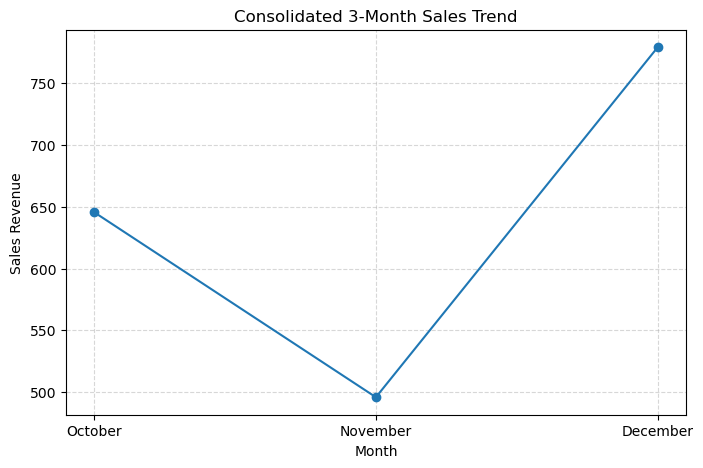

In [37]:
# --------- 4. CONSOLIDATED 3-MONTH SALES LINE PLOT ----------
plt.figure(figsize=(8, 5))
plt.plot(list(monthly_sales.keys()), list(monthly_sales.values()), marker='o')
plt.title('Consolidated 3-Month Sales Trend')
plt.ylabel('Sales Revenue')
plt.xlabel('Month')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

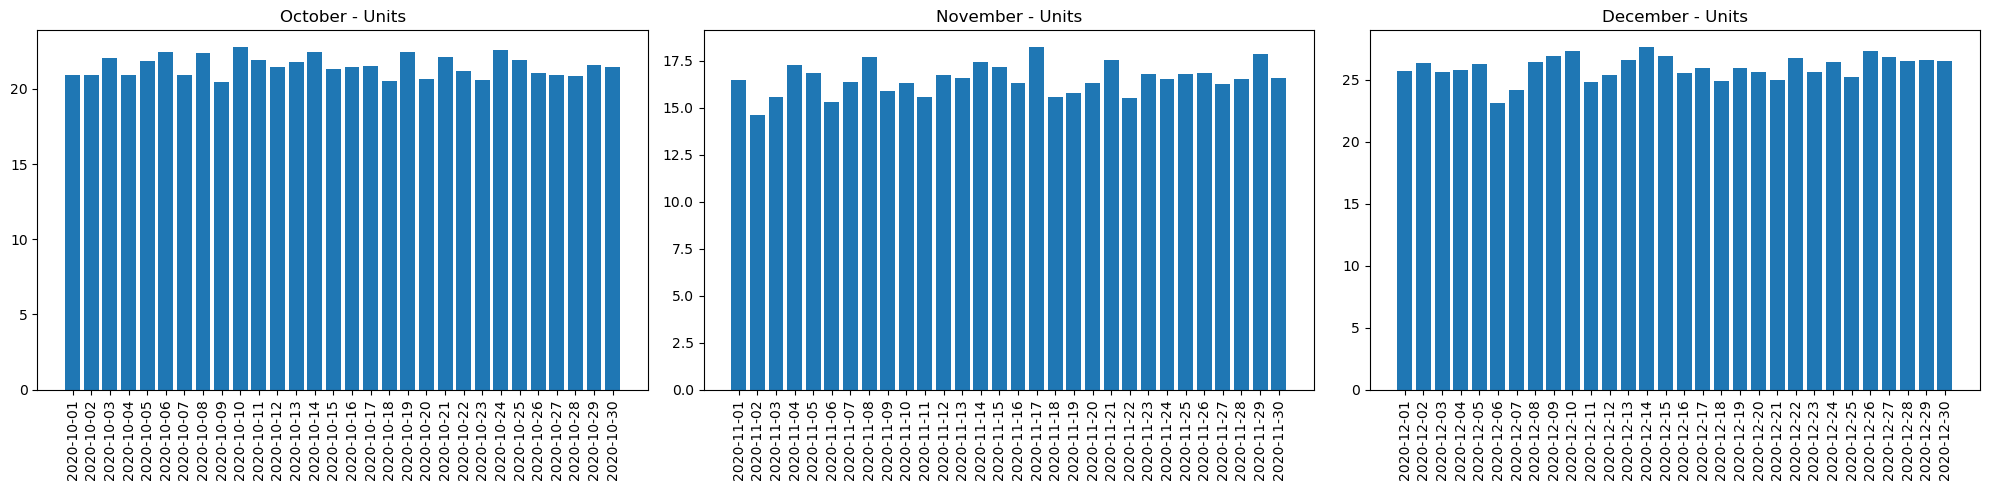

In [40]:
# COMPREHENSIVE SNAPSHOT
# Create daywise summaries for each month
oct_daywise = oct_df.groupby(oct_df.index.date)[['Unit', 'Sales']].sum()
nov_daywise = nov_df.groupby(nov_df.index.date)[['Unit', 'Sales']].sum()
dec_daywise = dec_df.groupby(dec_df.index.date)[['Unit', 'Sales']].sum()

# Convert dates to strings
oct_daywise.index = oct_daywise.index.astype(str)
nov_daywise.index = nov_daywise.index.astype(str)
dec_daywise.index = dec_daywise.index.astype(str)


fig, axes = plt.subplots(1, 3, figsize=(20, 5))

# October Units
axes[0].bar(oct_daywise.index, oct_daywise['Unit'])
axes[0].set_title("October - Units")
axes[0].tick_params(axis='x', rotation=90)

# November Units
axes[1].bar(nov_daywise.index, nov_daywise['Unit'])
axes[1].set_title("November - Units")
axes[1].tick_params(axis='x', rotation=90)

# December Units
axes[2].bar(dec_daywise.index, dec_daywise['Unit'])
axes[2].set_title("December - Units")
axes[2].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

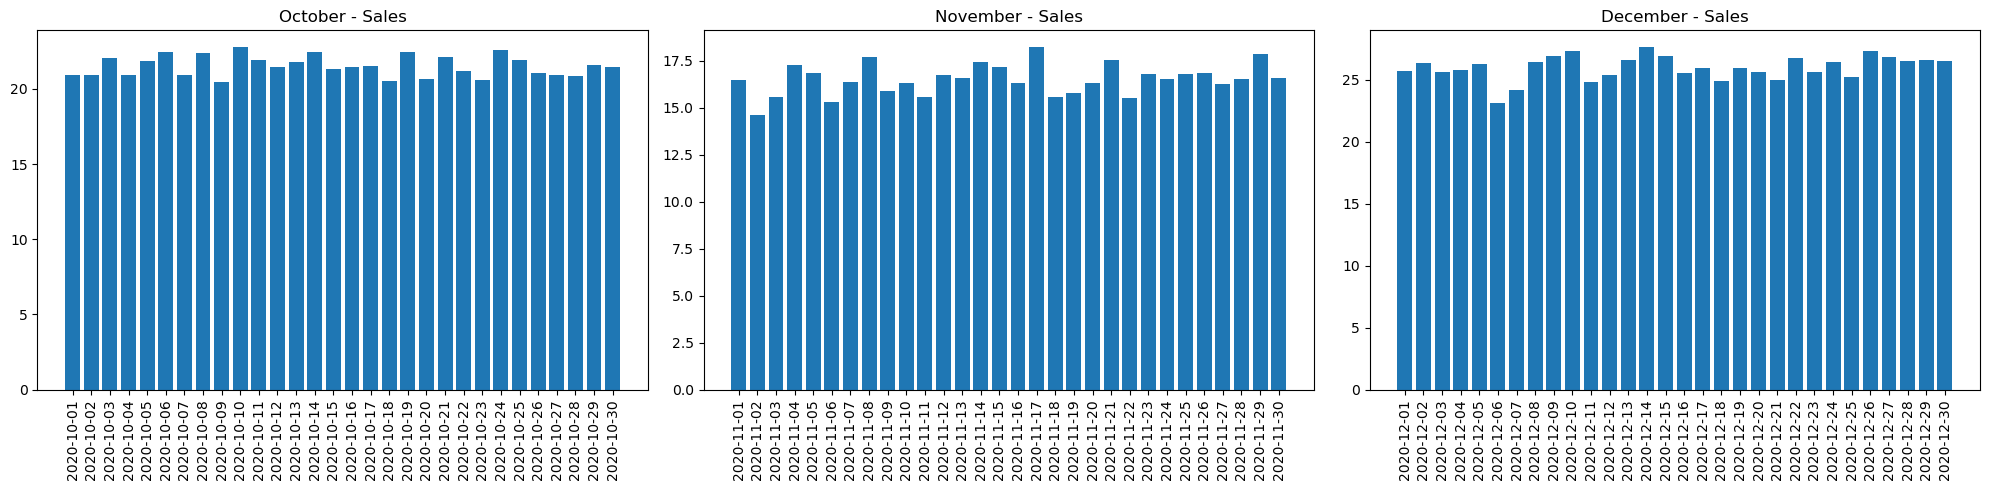

In [41]:
# COMPREHENSIVE SNAPSHOT FOR SALES
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

# October Sales
axes[0].bar(oct_daywise.index, oct_daywise['Sales'])
axes[0].set_title("October - Sales")
axes[0].tick_params(axis='x', rotation=90)

# November Sales
axes[1].bar(nov_daywise.index, nov_daywise['Sales'])
axes[1].set_title("November - Sales")
axes[1].tick_params(axis='x', rotation=90)

# December Sales
axes[2].bar(dec_daywise.index, dec_daywise['Sales'])
axes[2].set_title("December - Sales")
axes[2].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

Statewise Sales Summary:
State
 WA    106.365079
AZ     109.079365
CA     177.888889
FL     339.412698
KY     635.968254
NY     441.714286
TX     110.222222
Name: Sales, dtype: float64


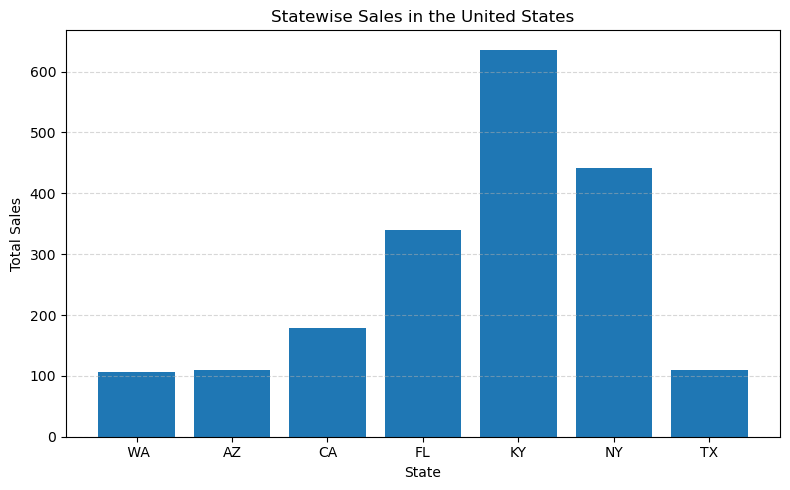

In [42]:
# Analyze Statewise Sales in the United States
statewise_sales = df.groupby('State')['Sales'].sum()

print("Statewise Sales Summary:")
print(statewise_sales)

# ---- BAR CHART ----
plt.figure(figsize=(8, 5))
plt.bar(statewise_sales.index, statewise_sales.values)

plt.title("Statewise Sales in the United States")
plt.xlabel("State")
plt.ylabel("Total Sales")
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

Groupwise Analysis:
               Unit       Sales
Group                          
Kids     480.142857  480.142857
Men      484.444444  484.444444
Seniors  473.571429  473.571429
Women    482.492063  482.492063


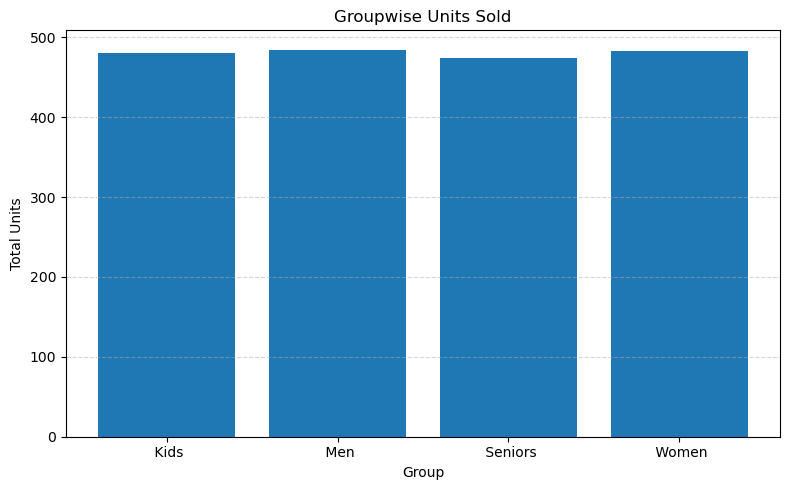

In [43]:
# GROUP ANALYSIS
groupwise = df.groupby('Group')[['Unit', 'Sales']].sum()

print("Groupwise Analysis:")
print(groupwise)
## FOR UNITS
plt.figure(figsize=(8, 5))
plt.bar(groupwise.index, groupwise['Unit'])
plt.title("Groupwise Units Sold")
plt.xlabel("Group")
plt.ylabel("Total Units")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Groupwise Analysis:
               Unit       Sales
Group                          
Kids     480.142857  480.142857
Men      484.444444  484.444444
Seniors  473.571429  473.571429
Women    482.492063  482.492063


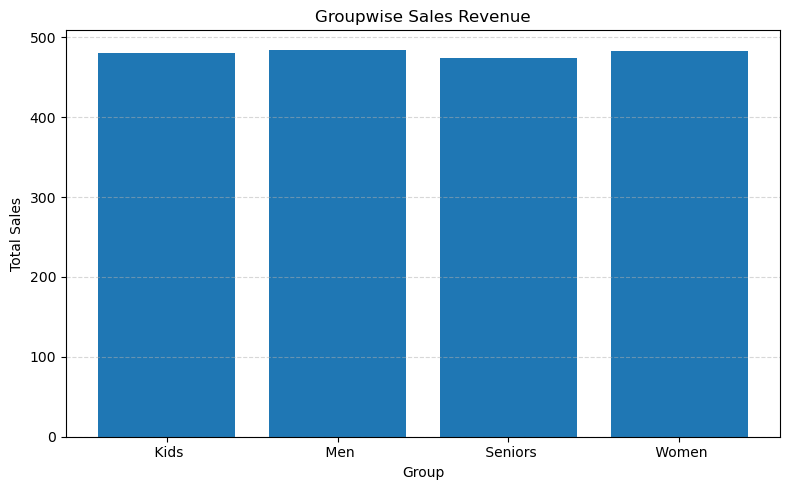

In [45]:
## GROUP ANALYSIS FOR SALES
groupwise = df.groupby('Group')[['Unit', 'Sales']].sum()

print("Groupwise Analysis:")
print(groupwise)

plt.figure(figsize=(8, 5))
plt.bar(groupwise.index, groupwise['Sales'])
plt.title("Groupwise Sales Revenue")
plt.xlabel("Group")
plt.ylabel("Total Sales")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Timewise Analysis:
                 Unit       Sales
Time                             
Afternoon  643.857143  643.857143
Evening    631.666667  631.666667
Morning    645.126984  645.126984


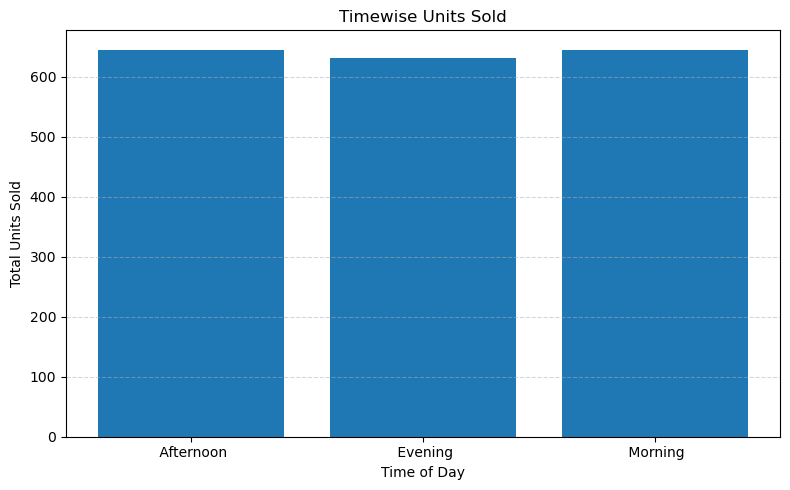

In [46]:
## TIMEWISE ANALYSIS
# FOR UNITS .......................
timewise = df.groupby('Time')[['Unit', 'Sales']].sum()

print("Timewise Analysis:")
print(timewise)

plt.figure(figsize=(8, 5))
plt.bar(timewise.index, timewise['Unit'])
plt.title("Timewise Units Sold")
plt.xlabel("Time of Day")
plt.ylabel("Total Units Sold")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Timewise Analysis:
                 Unit       Sales
Time                             
Afternoon  643.857143  643.857143
Evening    631.666667  631.666667
Morning    645.126984  645.126984


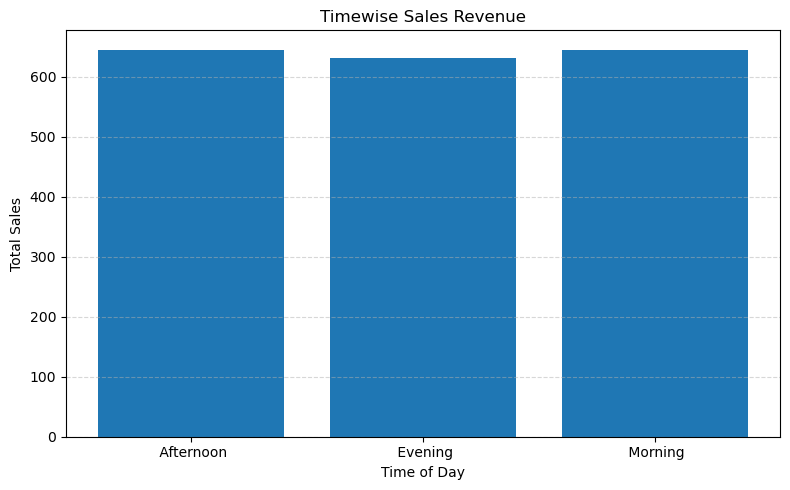

In [47]:
# TIME ANALYSIS FOR SALES
timewise = df.groupby('Time')[['Unit', 'Sales']].sum()

print("Timewise Analysis:")
print(timewise)

plt.figure(figsize=(8, 5))
plt.bar(timewise.index, timewise['Sales'])
plt.title("Timewise Sales Revenue")
plt.xlabel("Time of Day")
plt.ylabel("Total Sales")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()